In [45]:
# 1. Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
# 2. Load Dataset
# ==============================
df = pd.read_csv("Downloads/archive (16)/Online Sales Data.csv")

# Preview data
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [47]:
# 3. Basic Info
# ==============================
print(df.shape)
print(df.columns)
df.info()


(240, 9)
Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [48]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')


In [49]:
# ==============================
# 5. Check Missing Values
# ==============================
df.isnull().sum()


Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [50]:
# ==============================
# 6. Remove Duplicates
# ==============================
df = df.drop_duplicates()

print("Duplicates removed!")


Duplicates removed!


In [51]:
# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [52]:
# ==============================
# 8. Clean Text Columns
# ==============================
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    df[col] = df[col].str.strip().str.title()


In [53]:
# ==============================
# 9. Fix Negative or Zero Values
# ==============================
if 'sales' in df.columns:
    df = df[df['sales'] > 0]

if 'quantity' in df.columns:
    df = df[df['quantity'] > 0]


In [54]:
# ==============================
# 10. Check Outliers (Optional)
# ==============================
import matplotlib.pyplot as plt

if 'sales' in df.columns:
    df.boxplot(column=['sales'])
    plt.show()


In [55]:
# ==============================
# 11. Save Cleaned Data
# ==============================
df.to_csv("Cleaned_Online_Sales.csv", index=False)

print("Cleaned dataset saved!")


Cleaned dataset saved!


In [57]:
print("Total Revenue:", df['Total Revenue'].sum())

print("Total Units Sold:", df['Units Sold'].sum())

print("Average Order Value:", df['Total Revenue'].mean())

print("Total Transactions:", df['Transaction ID'].nunique())


Total Revenue: 80567.84999999999
Total Units Sold: 518
Average Order Value: 335.699375
Total Transactions: 240


In [58]:
cat_rev = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)

print(cat_rev)


Product Category
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Clothing            8128.93
Beauty Products     2621.90
Books               1861.93
Name: Total Revenue, dtype: float64


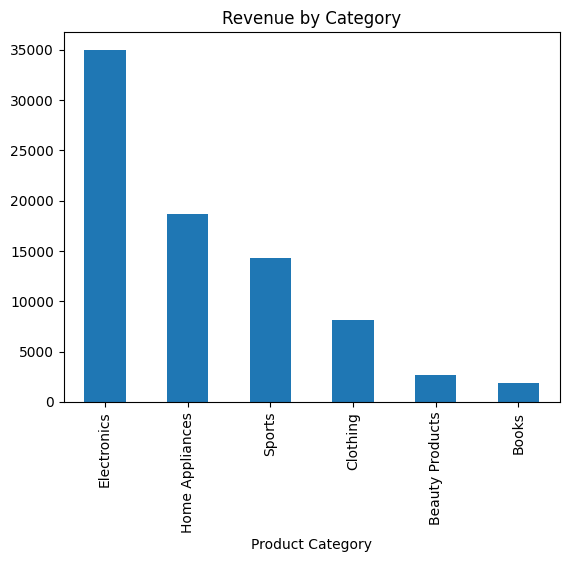

In [59]:
cat_rev.plot(kind='bar')
plt.title("Revenue by Category")
plt.show()


In [60]:
top_prod = df.groupby('Product Name')['Total Revenue'] \
             .sum() \
             .sort_values(ascending=False) \
             .head(10)

print(top_prod)


Product Name
Canon Eos R5 Camera                  3899.99
Lg Oled Tv                           2599.98
Macbook Pro 16-Inch                  2499.99
Apple Macbook Pro 16-Inch            2399.00
Iphone 14 Pro                        1999.98
Peloton Bike                         1895.00
Hp Spectre X360 Laptop               1599.99
Roomba I7+                           1599.98
Garmin Forerunner 945                1599.97
Samsung Odyssey G9 Gaming Monitor    1499.99
Name: Total Revenue, dtype: float64


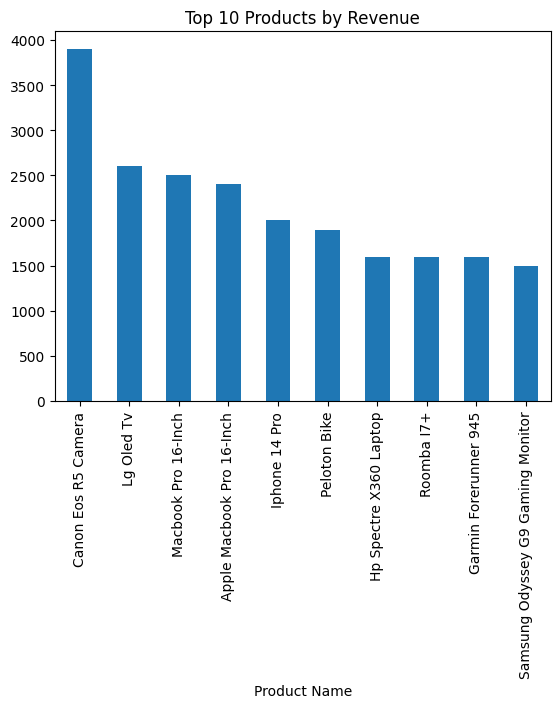

In [61]:
top_prod.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.show()


In [62]:
region_rev = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

print(region_rev)


Region
North America    36844.34
Asia             22455.45
Europe           21268.06
Name: Total Revenue, dtype: float64


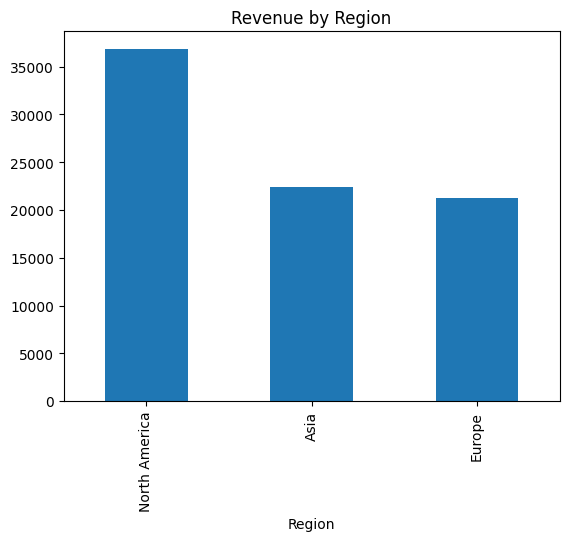

In [63]:
region_rev.plot(kind='bar')
plt.title("Revenue by Region")
plt.show()


In [64]:
pay_rev = df.groupby('Payment Method')['Total Revenue'].sum().sort_values(ascending=False)

print(pay_rev)


Payment Method
Credit Card    51170.86
Paypal         21268.06
Debit Card      8128.93
Name: Total Revenue, dtype: float64


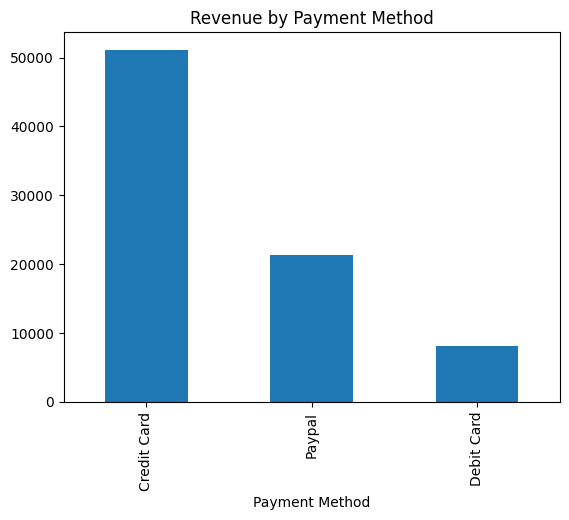

In [65]:
pay_rev.plot(kind='bar')
plt.title("Revenue by Payment Method")
plt.show()


In [66]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month


In [67]:
monthly = df.groupby('Month')['Total Revenue'].sum()

print(monthly)


Month
1    14548.32
2    10803.37
3    12849.24
4    12451.69
5     8455.49
6     7384.55
7     6797.08
8     7278.11
Name: Total Revenue, dtype: float64


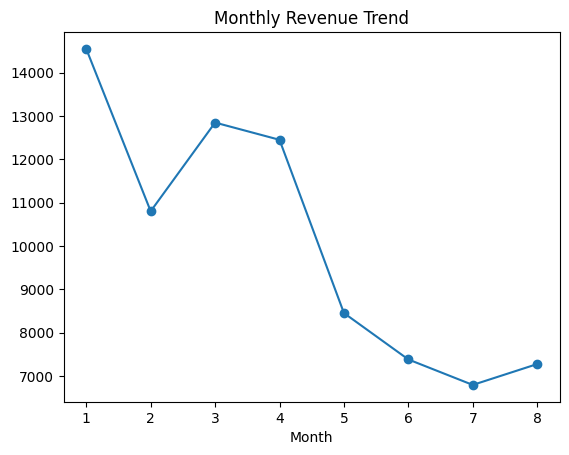

In [68]:
monthly.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.show()


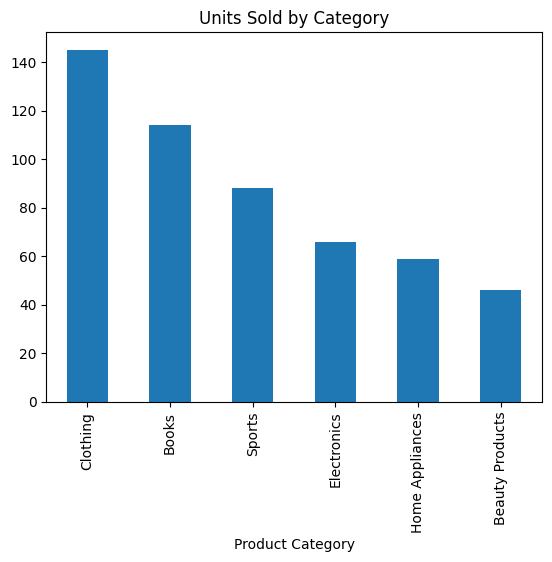

In [69]:
units_cat = df.groupby('Product Category')['Units Sold'].sum().sort_values(ascending=False)

units_cat.plot(kind='bar')
plt.title("Units Sold by Category")
plt.show()
